In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [10]:
df = pd.read_csv('response_times_post_update.csv')
df.head()

,iteracao,endpoint,tempo_resposta
0,1,register,0.489603
1,1,login,0.250274
2,1,refresh,0.055874
3,1,logout,0.062406
4,2,register,0.120031


In [11]:
stats = df.groupby('endpoint')['tempo_resposta'].describe()

print("Estatísticas descritivas por endpoint:")
print(stats)

Estatísticas descritivas por endpoint:
           count      mean       std       min       25%       50%       75%  \
endpoint                                                                       
login     1000.0  0.086724  0.011883  0.071613  0.079051  0.083310  0.091994   
logout    1000.0  0.019957  0.005368  0.013972  0.016518  0.018338  0.021805   
refresh   1000.0  0.019071  0.006681  0.013602  0.015950  0.017594  0.020192   
register  1000.0  0.089503  0.017334  0.070627  0.080785  0.087130  0.096295   

               max  
endpoint            
login     0.250274  
logout    0.062406  
refresh   0.173042  
register  0.489603  


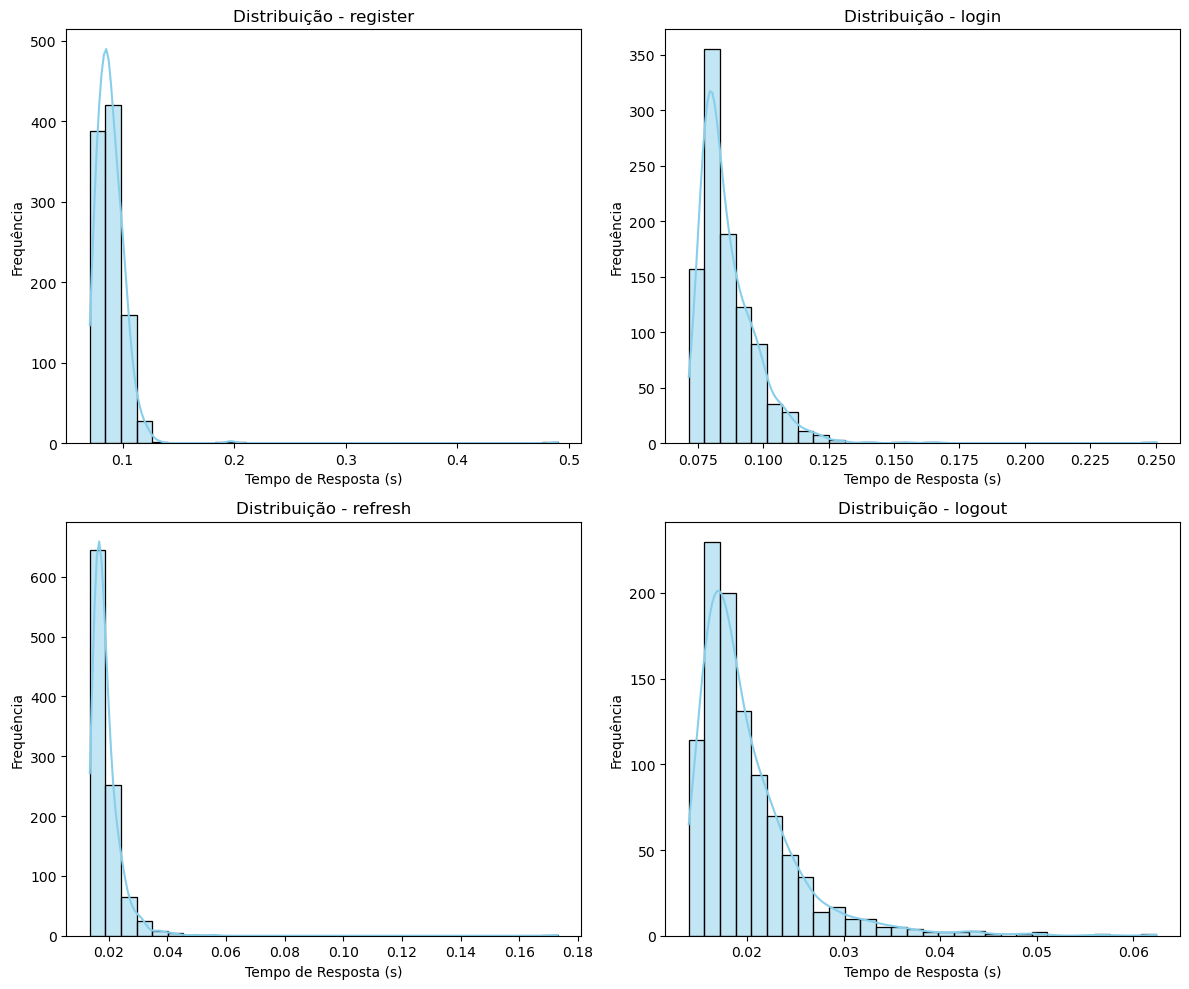

In [ ]:
plt.figure(figsize=(12, 10))
endpoints = df['endpoint'].unique()

for i, endpoint in enumerate(endpoints, 1):
    plt.subplot(2, 2, i)
    subset = df[df['endpoint'] == endpoint]
    sns.histplot(subset['tempo_resposta'], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribuição - {endpoint}')
    plt.xlabel('Tempo de Resposta (s)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


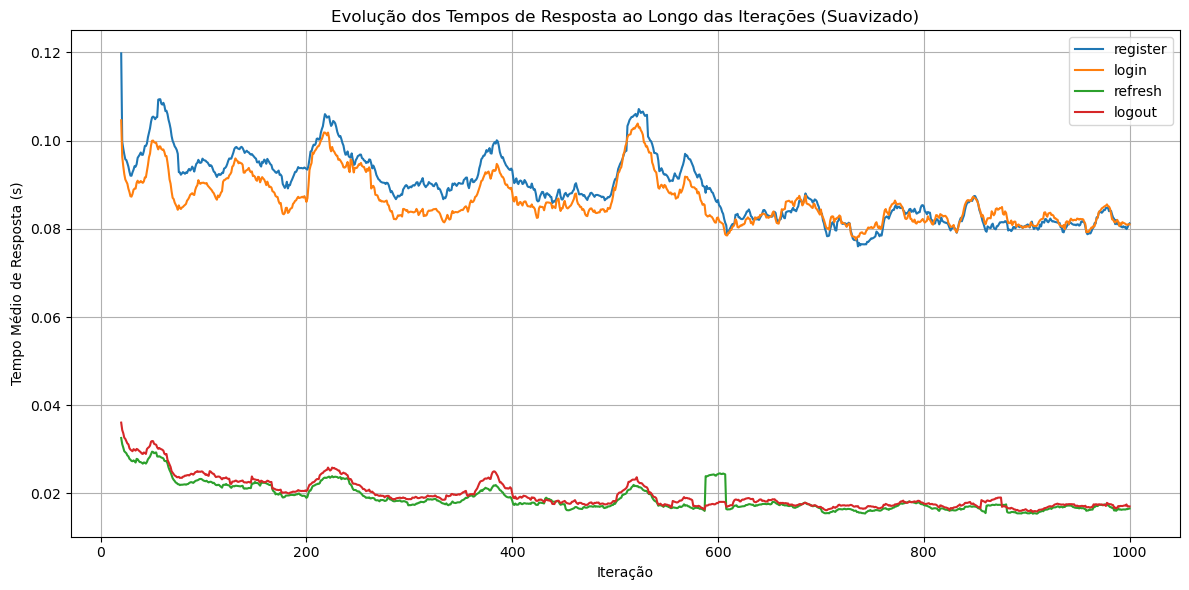

In [ ]:
plt.figure(figsize=(12, 6))

for endpoint in df['endpoint'].unique():
    subset = df[df['endpoint'] == endpoint]
    # Suaviza com rolling mean
    avg_per_iteration = subset.groupby('iteracao')['tempo_resposta'].mean().rolling(window=20).mean()
    plt.plot(avg_per_iteration, label=endpoint)

plt.title('Evolução dos Tempos de Resposta ao Longo das Iterações (Suavizado)')
plt.xlabel('Iteração')
plt.ylabel('Tempo Médio de Resposta (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_9276\4072570747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='endpoint', y='tempo_resposta', palette='Set2')


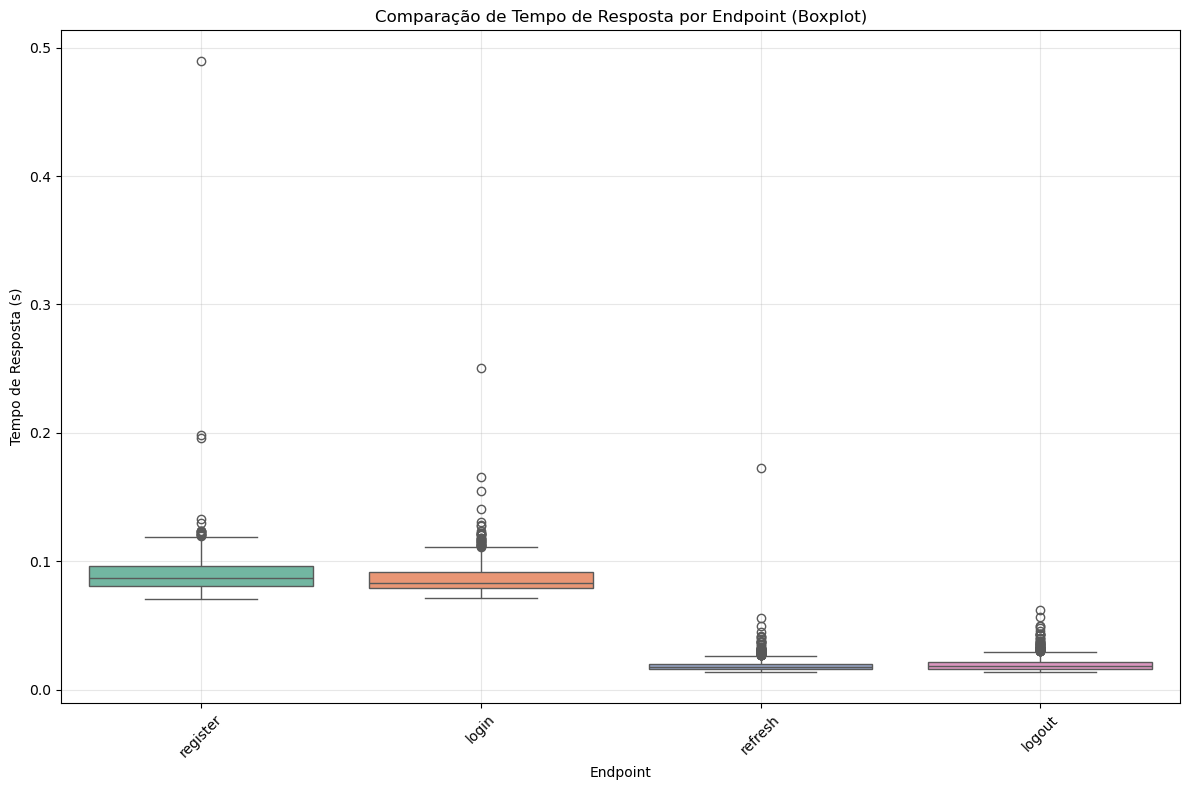

In [14]:
# Boxplot comparativo entre endpoints
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='endpoint', y='tempo_resposta', palette='Set2')
plt.title('Comparação de Tempo de Resposta por Endpoint (Boxplot)')
plt.xlabel('Endpoint')
plt.ylabel('Tempo de Resposta (s)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_9276\3047171909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='endpoint', y='tempo_resposta', palette='viridis', inner='box')


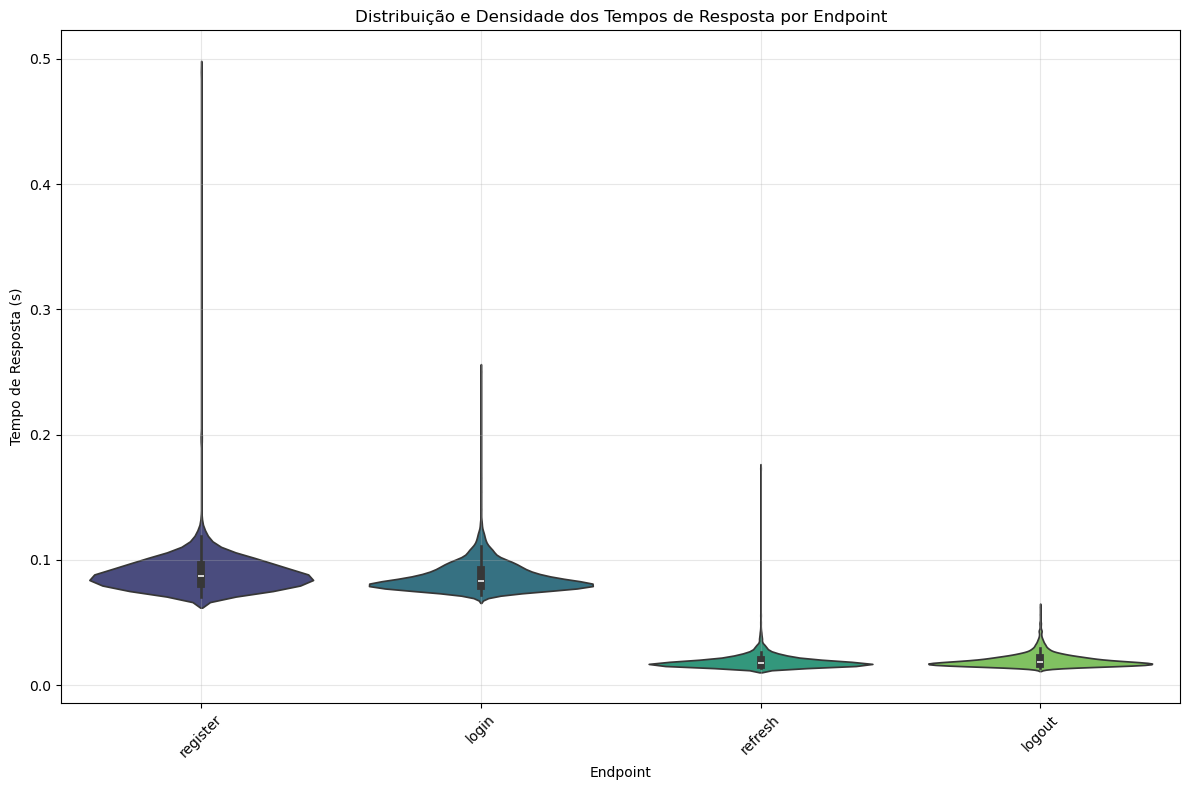

In [ ]:
# Violinplot para distribuição e densidade
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='endpoint', y='tempo_resposta', palette='viridis', inner='box')
plt.title('Distribuição e Densidade dos Tempos de Resposta por Endpoint')
plt.xlabel('Endpoint')
plt.ylabel('Tempo de Resposta (s)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


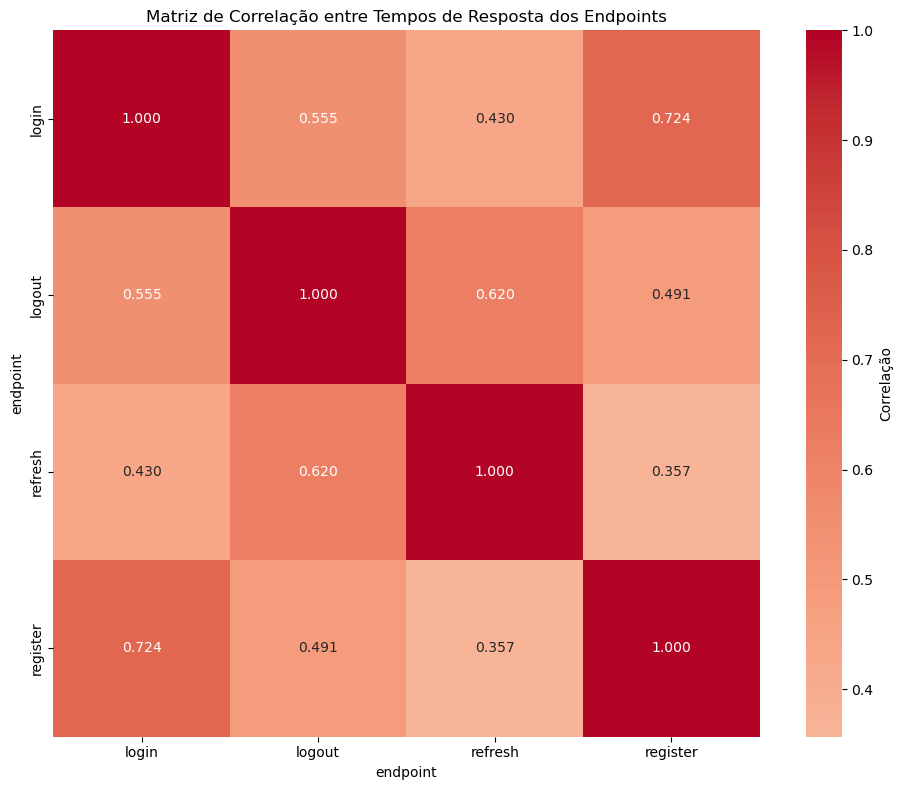

In [ ]:
# Heatmap de correlação entre tempos de resposta
pivot_df = df.pivot_table(values='tempo_resposta', index='iteracao', columns='endpoint')

correlation_matrix = pivot_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação entre Tempos de Resposta dos Endpoints')
plt.tight_layout()
plt.show()


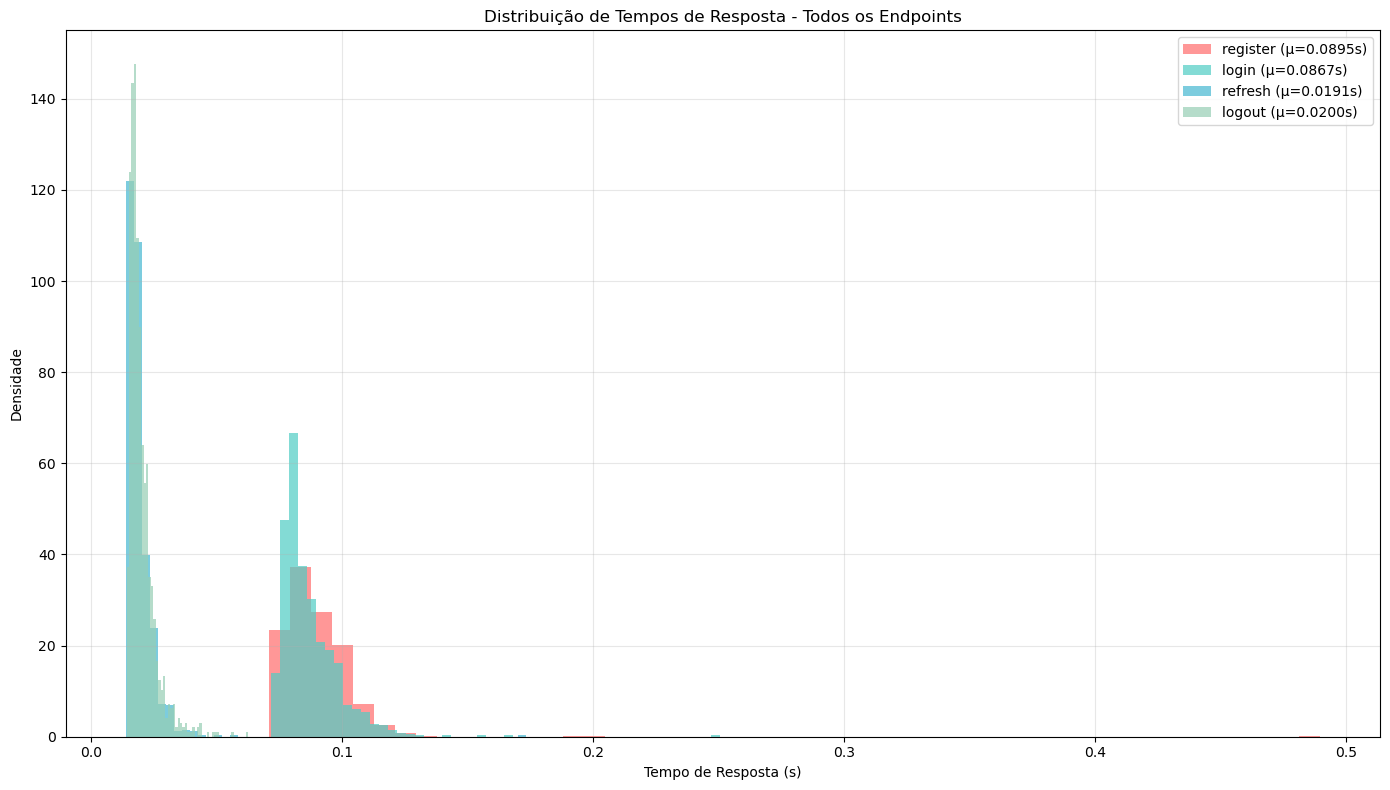

In [ ]:
# Histograma com distribuições sobrepostas
plt.figure(figsize=(14, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
endpoints = df['endpoint'].unique()

for i, endpoint in enumerate(endpoints):
    subset = df[df['endpoint'] == endpoint]
    plt.hist(subset['tempo_resposta'], bins=50, alpha=0.7, 
             label=f'{endpoint} (μ={subset["tempo_resposta"].mean():.4f}s)', 
             color=colors[i], density=True)

plt.title('Distribuição de Tempos de Resposta - Todos os Endpoints')
plt.xlabel('Tempo de Resposta (s)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


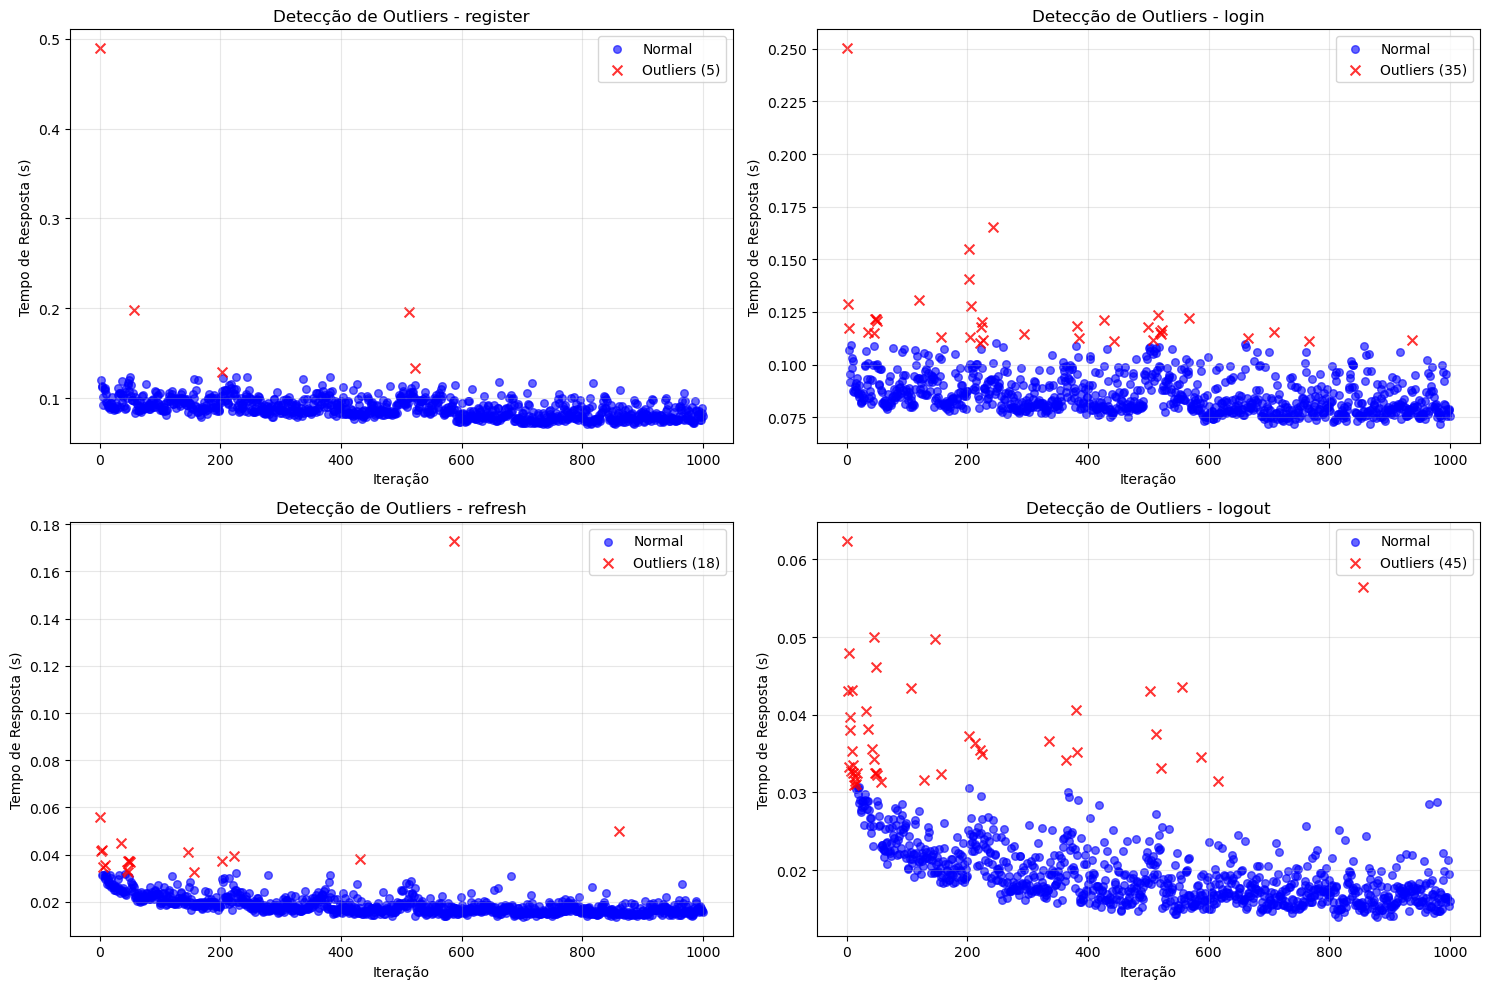

In [ ]:
# Análise de outliers
plt.figure(figsize=(15, 10))

for i, endpoint in enumerate(endpoints, 1):
    plt.subplot(2, 2, i)
    subset = df[df['endpoint'] == endpoint]
    
    # Detectar outliers usando Z-score
    z_scores = np.abs(stats.zscore(subset['tempo_resposta']))
    outliers = subset[z_scores > 2]  # Z-score > 2 considerado outlier
    normal_points = subset[z_scores <= 2]
    
    # Plot pontos normais
    plt.scatter(normal_points['iteracao'], normal_points['tempo_resposta'], 
               alpha=0.6, s=30, label='Normal', color='blue')
    
    # Plot outliers
    if len(outliers) > 0:
        plt.scatter(outliers['iteracao'], outliers['tempo_resposta'], 
                   alpha=0.8, s=50, label=f'Outliers ({len(outliers)})', 
                   color='red', marker='x')
    
    plt.title(f'Detecção de Outliers - {endpoint}')
    plt.xlabel('Iteração')
    plt.ylabel('Tempo de Resposta (s)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_9276\1222149124.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_means = df.groupby(['faixa_iteracao', 'endpoint'])['tempo_resposta'].mean().unstack()


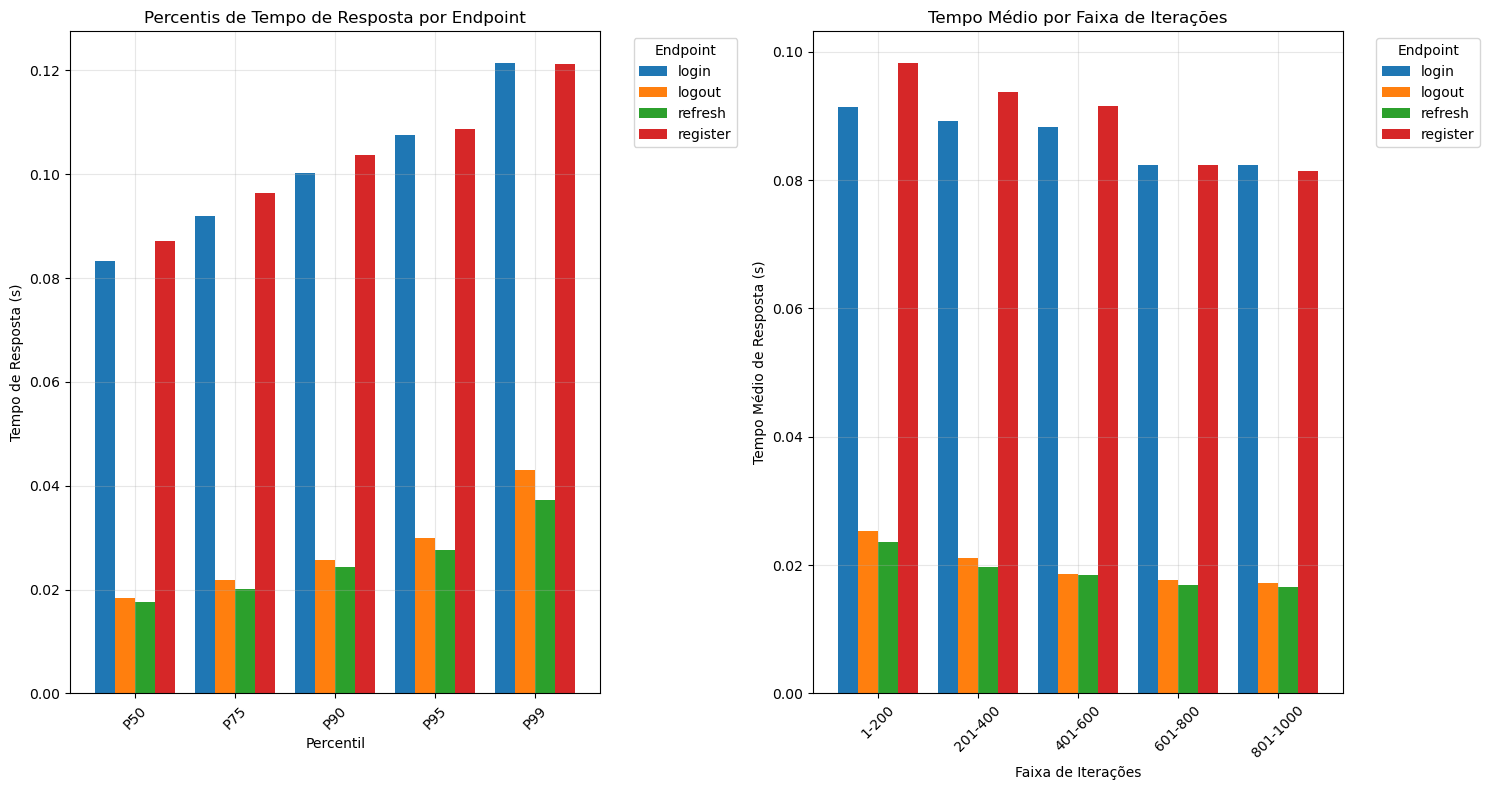

In [19]:
# Análise de percentis e desempenho
plt.figure(figsize=(15, 8))

# Calcular percentis para cada endpoint
percentiles = [50, 75, 90, 95, 99]
percentile_data = []

for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint]
    endpoint_percentiles = []
    for p in percentiles:
        value = np.percentile(subset['tempo_resposta'], p)
        endpoint_percentiles.append(value)
        percentile_data.append({'endpoint': endpoint, 'percentil': f'P{p}', 'tempo': value})

# Subplot 1: Gráfico de barras dos percentis
plt.subplot(1, 2, 1)
percentile_df = pd.DataFrame(percentile_data)
pivot_percentiles = percentile_df.pivot(index='percentil', columns='endpoint', values='tempo')

pivot_percentiles.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Percentis de Tempo de Resposta por Endpoint')
plt.xlabel('Percentil')
plt.ylabel('Tempo de Resposta (s)')
plt.legend(title='Endpoint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 2: Tempo médio por faixa de iterações
plt.subplot(1, 2, 2)
df['faixa_iteracao'] = pd.cut(df['iteracao'], bins=5, labels=['1-200', '201-400', '401-600', '601-800', '801-1000'])
faixa_means = df.groupby(['faixa_iteracao', 'endpoint'])['tempo_resposta'].mean().unstack()

faixa_means.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Tempo Médio por Faixa de Iterações')
plt.xlabel('Faixa de Iterações')
plt.ylabel('Tempo Médio de Resposta (s)')
plt.legend(title='Endpoint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


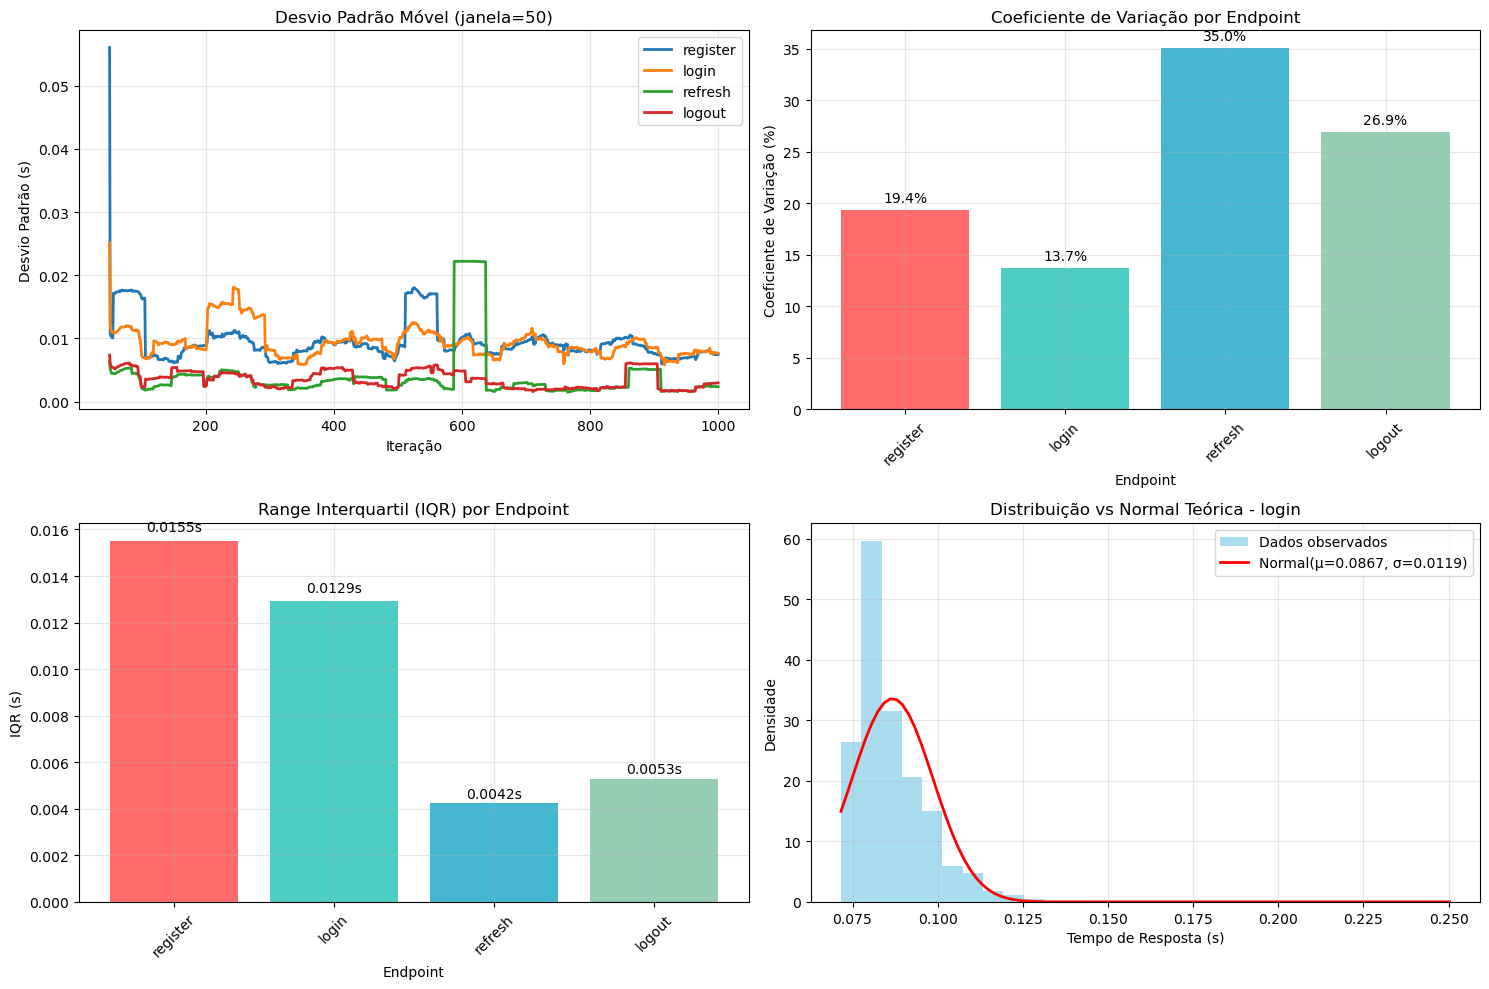

In [ ]:
plt.figure(figsize=(15, 10))

# Subplot 1: Desvio padrão móvel
plt.subplot(2, 2, 1)
window_size = 50
for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint].sort_values('iteracao')
    rolling_std = subset['tempo_resposta'].rolling(window=window_size).std()
    plt.plot(subset['iteracao'], rolling_std, label=endpoint, linewidth=2)

plt.title(f'Desvio Padrão Móvel (janela={window_size})')
plt.xlabel('Iteração')
plt.ylabel('Desvio Padrão (s)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Coeficiente de variação
plt.subplot(2, 2, 2)
cv_data = []
for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint]
    cv = (subset['tempo_resposta'].std() / subset['tempo_resposta'].mean()) * 100
    cv_data.append({'endpoint': endpoint, 'cv': cv})

cv_df = pd.DataFrame(cv_data)
bars = plt.bar(cv_df['endpoint'], cv_df['cv'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Coeficiente de Variação por Endpoint')
plt.xlabel('Endpoint')
plt.ylabel('Coeficiente de Variação (%)')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%', 
             ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Subplot 3: Range interquartil
plt.subplot(2, 2, 3)
iqr_data = []
for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint]
    q75 = subset['tempo_resposta'].quantile(0.75)
    q25 = subset['tempo_resposta'].quantile(0.25)
    iqr = q75 - q25
    iqr_data.append({'endpoint': endpoint, 'iqr': iqr})

iqr_df = pd.DataFrame(iqr_data)
bars = plt.bar(iqr_df['endpoint'], iqr_df['iqr'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Range Interquartil (IQR) por Endpoint')
plt.xlabel('Endpoint')
plt.ylabel('IQR (s)')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.02, f'{height:.4f}s', 
             ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Subplot 4: Densidade com curva normal sobreposta
plt.subplot(2, 2, 4)
from scipy.stats import norm
endpoint_focus = 'login'  # Foco no endpoint com maior variação
subset = df[df['endpoint'] == endpoint_focus]

# Histograma
plt.hist(subset['tempo_resposta'], bins=30, density=True, alpha=0.7, 
         color='skyblue', label='Dados observados')

# Curva normal teórica
mu, sigma = subset['tempo_resposta'].mean(), subset['tempo_resposta'].std()
x = np.linspace(subset['tempo_resposta'].min(), subset['tempo_resposta'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label=f'Normal(μ={mu:.4f}, σ={sigma:.4f})')

plt.title(f'Distribuição vs Normal Teórica - {endpoint_focus}')
plt.xlabel('Tempo de Resposta (s)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
print("="*80)
print("📊 RELATÓRIO DE ANÁLISE DE PERFORMANCE - API IAM")
print("="*80)

print("\n🎯 RESUMO GERAL:")
print(f"Total de requisições testadas: {len(df):,}")
print(f"Número de iterações: {df['iteracao'].nunique():,}")
print(f"Endpoints testados: {', '.join(endpoints)}")

print("\n⚡ MÉTRICAS DE PERFORMANCE POR ENDPOINT:")
for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint]
    print(f"\n  {endpoint.upper()}:")
    print(f"    • Tempo médio: {subset['tempo_resposta'].mean():.4f}s")
    print(f"    • Tempo mediano: {subset['tempo_resposta'].median():.4f}s")
    print(f"    • Desvio padrão: {subset['tempo_resposta'].std():.4f}s")
    print(f"    • Min/Max: {subset['tempo_resposta'].min():.4f}s / {subset['tempo_resposta'].max():.4f}s")
    print(f"    • P95: {np.percentile(subset['tempo_resposta'], 95):.4f}s")
    print(f"    • P99: {np.percentile(subset['tempo_resposta'], 99):.4f}s")

print("\n🔍 ANÁLISE DE OUTLIERS:")
for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint]
    z_scores = np.abs(stats.zscore(subset['tempo_resposta']))
    outliers_count = len(subset[z_scores > 2])
    outliers_percentage = (outliers_count / len(subset)) * 100
    print(f"  {endpoint}: {outliers_count} outliers ({outliers_percentage:.1f}%)")

print("\n📈 RANKING DE PERFORMANCE (Tempo Médio):")
ranking = df.groupby('endpoint')['tempo_resposta'].mean().sort_values()
for i, (endpoint, time) in enumerate(ranking.items(), 1):
    print(f"  {i}º {endpoint}: {time:.4f}s")

print("\n🎛️ ESTABILIDADE (Coeficiente de Variação):")
stability_ranking = []
for endpoint in endpoints:
    subset = df[df['endpoint'] == endpoint]
    cv = (subset['tempo_resposta'].std() / subset['tempo_resposta'].mean()) * 100
    stability_ranking.append((endpoint, cv))

stability_ranking.sort(key=lambda x: x[1])
for i, (endpoint, cv) in enumerate(stability_ranking, 1):
    stability_level = "Muito Estável" if cv < 10 else "Estável" if cv < 20 else "Moderado" if cv < 30 else "Instável"
    print(f"  {i}º {endpoint}: {cv:.1f}% ({stability_level})")

print("\n" + "="*80)


📊 RELATÓRIO DE ANÁLISE DE PERFORMANCE - API IAM

🎯 RESUMO GERAL:
Total de requisições testadas: 4,000
Número de iterações: 1,000
Endpoints testados: register, login, refresh, logout

⚡ MÉTRICAS DE PERFORMANCE POR ENDPOINT:

  REGISTER:
    • Tempo médio: 0.0895s
    • Tempo mediano: 0.0871s
    • Desvio padrão: 0.0173s
    • Min/Max: 0.0706s / 0.4896s
    • P95: 0.1087s
    • P99: 0.1212s

  LOGIN:
    • Tempo médio: 0.0867s
    • Tempo mediano: 0.0833s
    • Desvio padrão: 0.0119s
    • Min/Max: 0.0716s / 0.2503s
    • P95: 0.1075s
    • P99: 0.1214s

  REFRESH:
    • Tempo médio: 0.0191s
    • Tempo mediano: 0.0176s
    • Desvio padrão: 0.0067s
    • Min/Max: 0.0136s / 0.1730s
    • P95: 0.0275s
    • P99: 0.0373s

  LOGOUT:
    • Tempo médio: 0.0200s
    • Tempo mediano: 0.0183s
    • Desvio padrão: 0.0054s
    • Min/Max: 0.0140s / 0.0624s
    • P95: 0.0299s
    • P99: 0.0430s

🔍 ANÁLISE DE OUTLIERS:
  register: 5 outliers (0.5%)
  login: 35 outliers (3.5%)
  refresh: 18 outliers (1

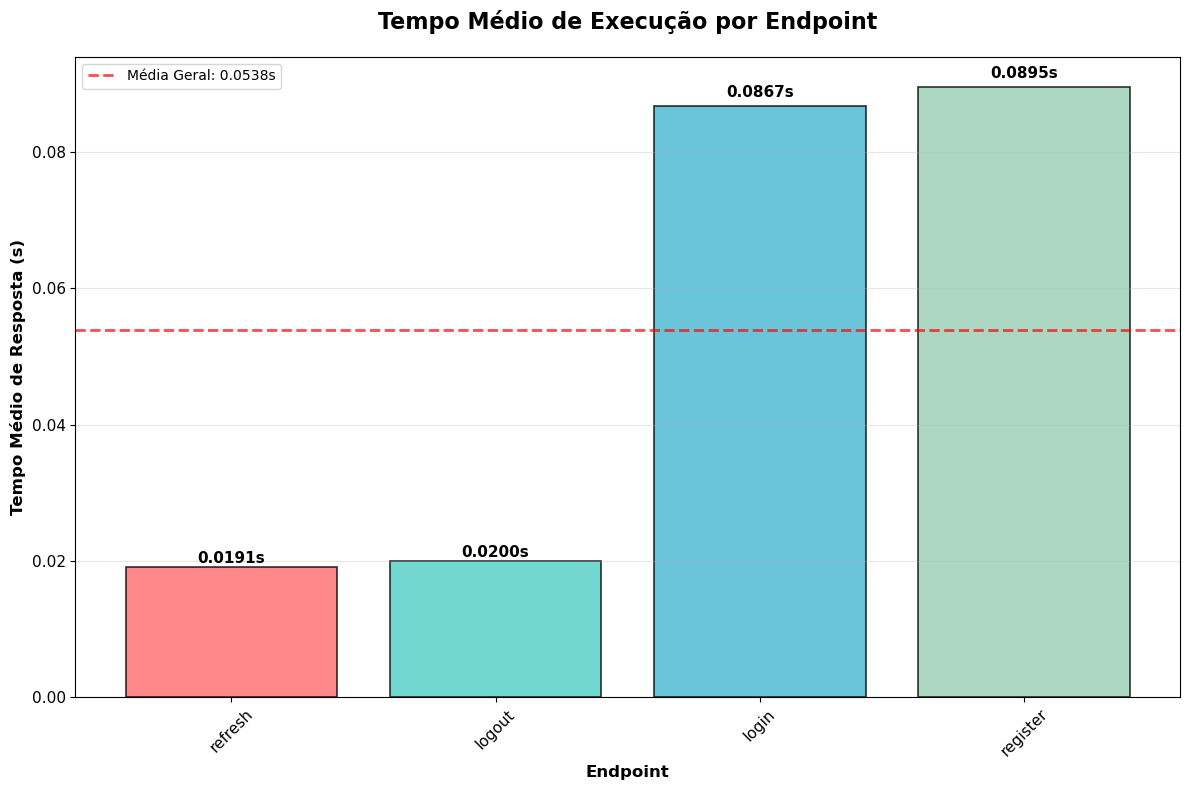

In [ ]:
plt.figure(figsize=(12, 8))


mean_times = df.groupby('endpoint')['tempo_resposta'].mean().sort_values()


bars = plt.bar(mean_times.index, mean_times.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
               alpha=0.8, edgecolor='black', linewidth=1.2)


for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01, 
             f'{height:.4f}s', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

plt.title('Tempo Médio de Execução por Endpoint', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Endpoint', fontsize=12, fontweight='bold')
plt.ylabel('Tempo Médio de Resposta (s)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')


overall_mean = df['tempo_resposta'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', linewidth=2, 
            label=f'Média Geral: {overall_mean:.4f}s', alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()
